## 1. Load data

In [65]:
import pandas
file_name = "/Users/yingshanli/CSCE878 intro ML/Recitation/CSE478-Recitation 3/winequality-white.csv"
wine = pandas.read_csv((file_name), delimiter=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## 2. Create the Data Matrix and the Target Vector

In [125]:
X = wine[wine.columns[0:-1]]

y = (wine['quality'] > 5).astype(np.int)
print(X.shape)
print(y.shape)

(4898, 11)
(4898,)


## 3. Statistical description

In [83]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## 4. Seaborn plotting

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


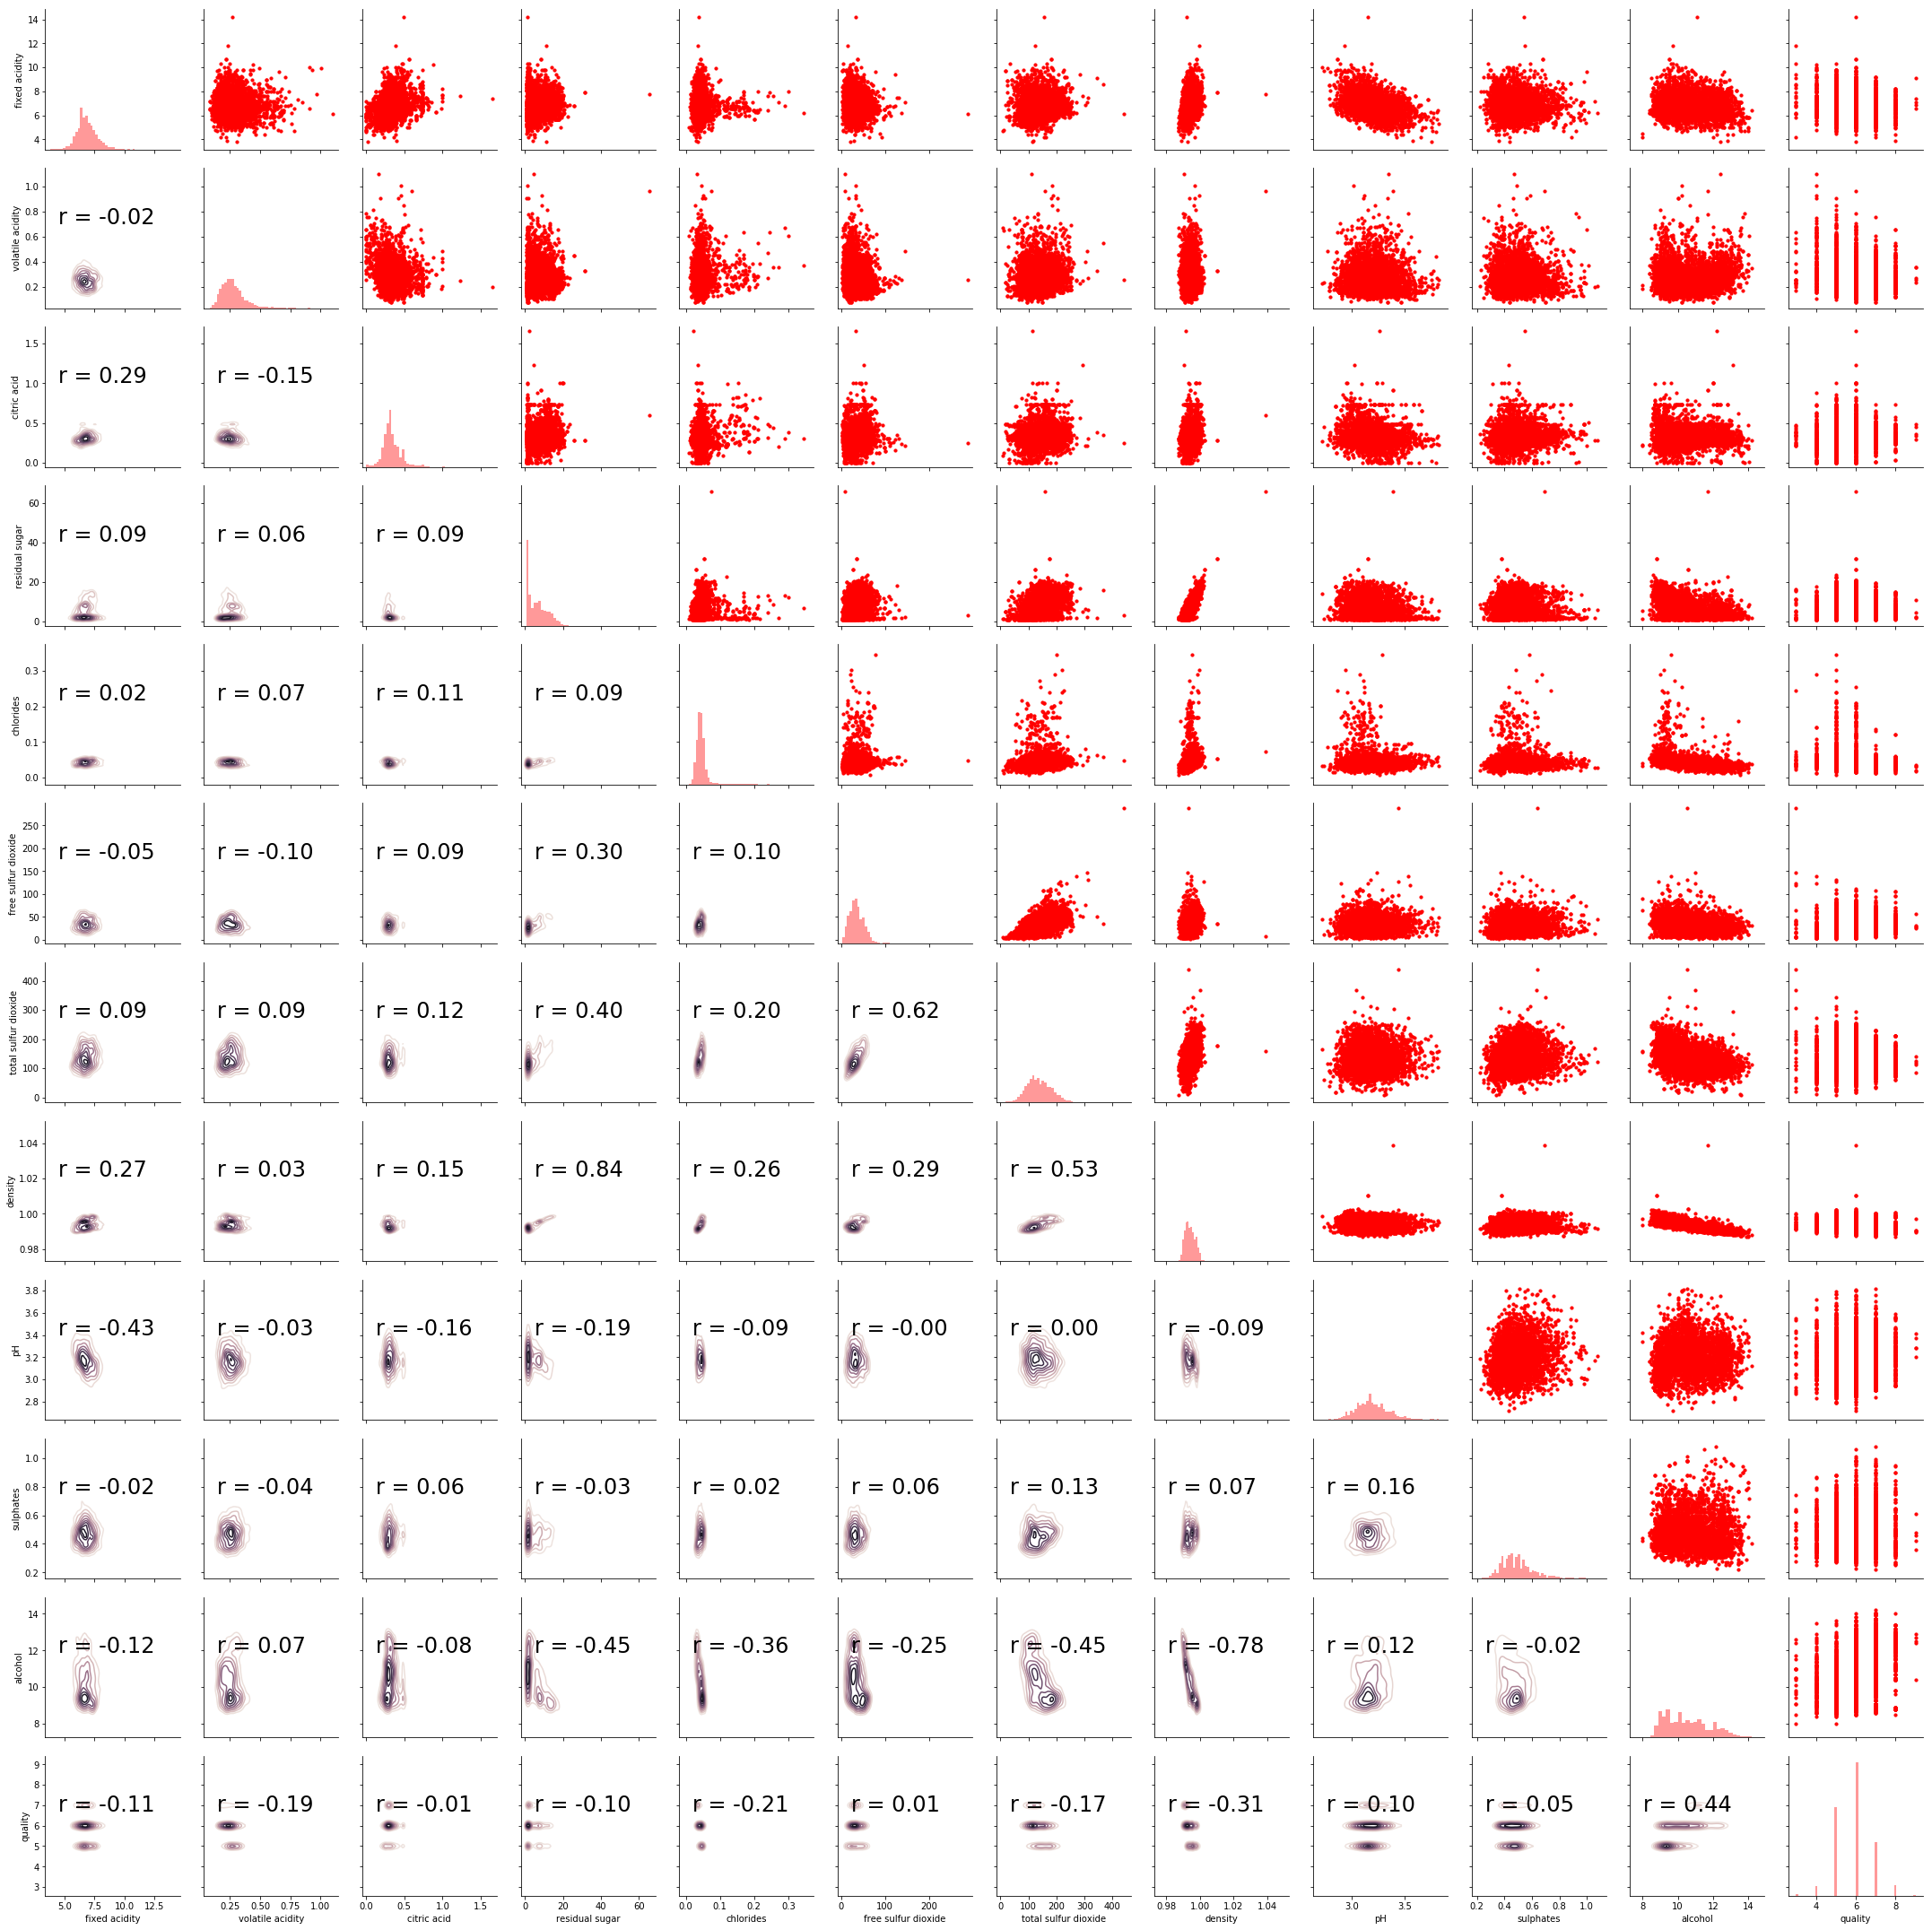

In [87]:
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats

# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(wine)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

## 5. Identify and drop the redundant features

According to the pair plots, the density and residual sugar are highly correlated. This we can remove one of the two columns

In [126]:
del X['density']

## 6. Partition the dataset into train and test set

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


## 7. Standardize each feature of the training and test set

In [128]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X) 
X = scaler.transform(X)

## 8. Create the K-NN Model & Vary K

In [129]:
# import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Set the the range of K 
neighbors = np.arange(1,30)

# Two arrays to store training and test accuracies
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    
    # The "score" function returns the mean accuracy on the given train/test data and labels.
    # Note that "accuracy" may not be a good performance measure in a skewed data set
    # Thus, we need to do hyperparameter tuning by using better performance measures (e.g., f1 score, presision, recall)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 
    

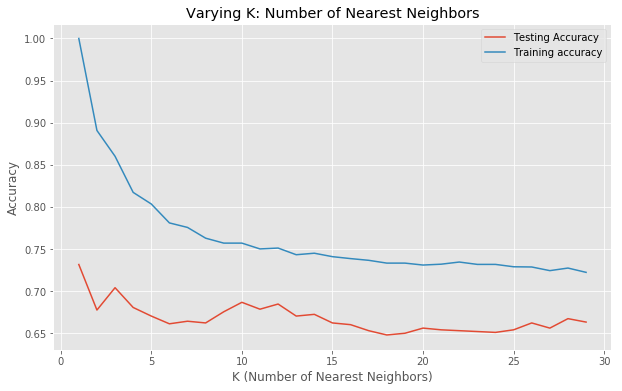

In [130]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
plt.title('Varying K: Number of Nearest Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('K (Number of Nearest Neighbors)')
plt.ylabel('Accuracy')
plt.show()

## 9. Cross-Validation

In [131]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

# The param_grid tells Scikit-Learn to first evaluate all 50 × 2 = 100 combinations of 
#   n_neighbors and p hyperparameter values specified in the dict
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 15, 21, 23, 33, 35, 37], 'p': [1, 2, 10, 100], 'weights': ["uniform", "distance"]}

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, param_grid, scoring='f1', cv=10)
knn_cv.fit(X_train, y_train)

print("Best Score: %f" % knn_cv.best_score_)
print("Optimal Hyperparameter Values: ", knn_cv.best_params_)

Best Score: 0.856156
Optimal Hyperparameter Values:  {'n_neighbors': 21, 'p': 1, 'weights': 'distance'}


## 10. Train Scikit-Learn's model using optimal hyperparameter values 

Using the optimal hyperparameter values, create the best model.
Then, fit the model.

In [132]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(weights="uniform", algorithm='auto', n_neighbors=21, p=1)
knn.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=21, p=1,
           weights='uniform')

## 11. Evaluate Model Performance 

Evaluate the model's performance using cross-validation. 

Use Scikit-Learn's cross_val_score function. 

Note that the "scoring" argument should be set based on the type of classification (binary/multiclass).

In [133]:
from sklearn.model_selection import cross_val_score

# Scoring Parameter for Classification:
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# Note: For a skewed data set "accuracy" might not be a good choice for scoring
scores = cross_val_score(knn, X_train, y_train, scoring='f1', cv=3)
print(scores)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.81056374  0.80271399  0.80354351]
Accuracy: 0.81 (+/- 0.01)


## 12. Report the train data performance measures: Precision, Recall, F1 Score and confusion matrix

### Evalute The Model Using Confusion Matrix

In [134]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


y_train_pred = cross_val_predict(knn, X_train, y_train, cv=3)

confusion_matrix(y_train, y_train_pred)

array([[ 452,  833],
       [ 295, 2338]])

### Precision, Recall, F1 Score

In [135]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_train, y_train_pred) 
print("Precision = %f" % precision)

recall = recall_score(y_train, y_train_pred)
print("Recall = %f" % recall)


f1 = f1_score(y_train, y_train_pred)
print("F1 Score = %f" % f1)

Precision = 0.737307
Recall = 0.887961
F1 Score = 0.805651


## 12. Generate the ROC curve for the train data

In [136]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve


# Get the 2nd column of the matrix of predicted probabilities for each data point
# The 2nd column stores the probalities of the positive class
y_scores = cross_val_predict(knn, X_train, y_train, method="predict_proba", cv=3)[:, 1]


fpr, tpr, thresholds = roc_curve(y_train, y_scores)

print("\nFPR FPR & TPR for Various Threshold Values:")

print("FPR: ", fpr)
print("TPR: ", tpr)
print("\nThresholds: ", thresholds)


FPR FPR & TPR for Various Threshold Values:
FPR:  [ 0.          0.00622568  0.02412451  0.05136187  0.09727626  0.1540856
  0.2155642   0.29105058  0.3844358   0.47081712  0.55953307  0.64824903
  0.74396887  0.82645914  0.89027237  0.94085603  0.9688716   0.98677043
  0.99766537  0.99844358  1.        ]
TPR:  [ 0.          0.04291682  0.12875047  0.22901633  0.33459932  0.43828333
  0.53703     0.62286365  0.7014812   0.76984428  0.83706798  0.8879605
  0.92328143  0.95024687  0.96885682  0.98442841  0.99202431  0.99772123
  0.99924041  1.          1.        ]

Thresholds:  [ 2.          1.          0.95238095  0.9047619   0.85714286  0.80952381
  0.76190476  0.71428571  0.66666667  0.61904762  0.57142857  0.52380952
  0.47619048  0.42857143  0.38095238  0.33333333  0.28571429  0.23809524
  0.19047619  0.14285714  0.0952381 ]


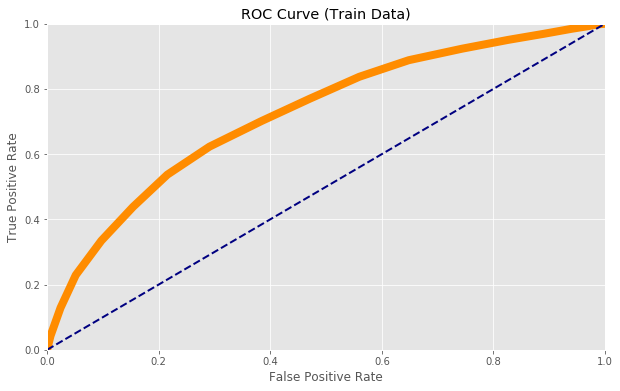

In [137]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig = plt.figure(figsize=(10, 6))
def plot_roc_curve(fpr, tpr, label=None): 
    plt.plot(fpr, tpr, color='darkorange', linewidth=8, label=label) 
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.axis([0, 1, 0, 1])
    plt.title('ROC Curve (Train Data)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

## 13. Report the area under the curve score for the ROC curve

In [138]:
# Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train,y_scores)

0.72167564923501626

## 14. Generate the precision-recall curve for the train data. Report the optimal threshold. 


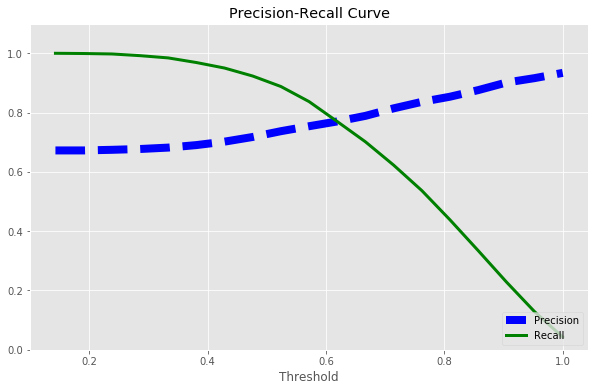

In [139]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Get the 2nd column of the matrix of predicted probabilities for each data point
#    The 2nd column stores the probalities of the positive class
y_scores = cross_val_predict(knn, X_train, y_train, method="predict_proba", cv=3)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)


fig = plt.figure(figsize=(10, 6))
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b--",  linewidth=8, label="Precision") 
    plt.plot(thresholds, recalls[:-1], "g-",  linewidth=3, label="Recall") 
    plt.xlabel("Threshold")
    plt.legend(loc="lower right")
    plt.title('Precision-Recall Curve')
    #plt.xlim([0, 1])
    plt.ylim([0, 1.1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

## 15. Evaluate The Model Using Test Data

The KNeighborsClassifier model has a default "score" function that computes the accuracy of the model.
Often times the accuracy is not a good measure.
We also compute the other performance measures, such as the confusion matrix, precision, recall, and the F1 score for the test data.

### Confusion Matrix for Test Data

In [140]:
# The accuracy of the model
score = knn.score(X_test, y_test)
print("Accuracy: %f" % score)

# No. of Correct Predictions
y_test_predicted = knn.predict(X_test)
print("\nNo. of correct predictions (Test): %d/%d" % (np.sum(y_test_predicted == y_test), len(y_test)))

# Confusion Matrix
print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test, y_test_predicted))

Accuracy: 0.651020

No. of correct predictions (Test): 638/980

Confusion Matrix (Test Data):
 [[111 244]
 [ 98 527]]


### Precision, Recall & F1 Score for Test Data

In [141]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_test_predicted) 
print("Precision = %f" % precision)

recall = recall_score(y_test, y_test_predicted)
print("Recall = %f" % recall)


f1 = f1_score(y_test, y_test_predicted)
print("F1 Score = %f" % f1)

Precision = 0.683528
Recall = 0.843200
F1 Score = 0.755014


### ROC Curve for Test Data

In [142]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve

# Get the 2nd column of the matrix of predicted probabilities for each data point
#    The 2nd column stores the probalities of the positive class
y_scores_test = cross_val_predict(knn, X_test, y_test, method="predict_proba", cv=3)[:, 1]

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_scores_test)


print("\nFPR FPR & TPR for Various Threshold Values:")
print("FPR: ", fpr_test)
print("TPR: ", tpr_test)
print("\nThresholds: ", thresholds_test)


FPR FPR & TPR for Various Threshold Values:
FPR:  [ 0.          0.0056338   0.02253521  0.03943662  0.05633803  0.07605634
  0.10422535  0.15211268  0.24788732  0.37746479  0.49859155  0.65352113
  0.78309859  0.85352113  0.93239437  0.96338028  0.98591549  1.        ]
TPR:  [ 0.      0.0256  0.0896  0.1808  0.2544  0.3488  0.4192  0.48    0.552
  0.6304  0.7264  0.8144  0.8752  0.9424  0.976   0.9904  0.9968  1.    ]

Thresholds:  [ 2.          1.          0.95238095  0.9047619   0.85714286  0.80952381
  0.76190476  0.71428571  0.66666667  0.61904762  0.57142857  0.52380952
  0.47619048  0.42857143  0.38095238  0.33333333  0.28571429  0.23809524]


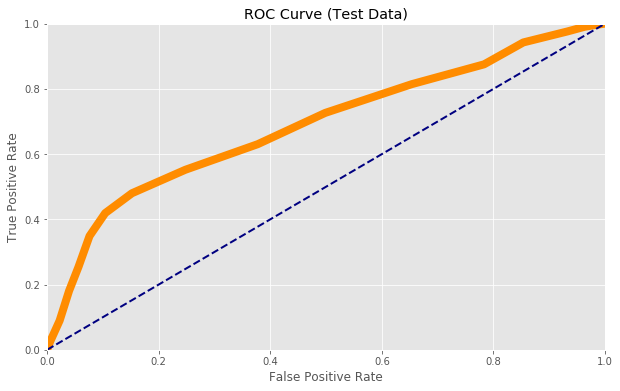

In [143]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig = plt.figure(figsize=(10, 6))
def plot_roc_curve(fpr_test, tpr_test, label=None): 
    plt.plot(fpr_test, tpr_test, color='darkorange', linewidth=8, label=label) 
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.axis([0, 1, 0, 1])
    plt.title('ROC Curve (Test Data)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr_test, tpr_test)
plt.show()


### Area Under the ROC Curve (Test Data)

In [144]:
# Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_scores_test)

0.68889915492957743

### Confusion Matrix

In [146]:
import pandas as pd

pd.crosstab(y_test, y_test_predicted, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,111,244,355
1,98,527,625
All,209,771,980


### Summary of Classification Metrics

In [147]:
# import classification_report
from sklearn.metrics import classification_report

print(classification_report(y_test,y_test_predicted))

             precision    recall  f1-score   support

          0       0.53      0.31      0.39       355
          1       0.68      0.84      0.76       625

avg / total       0.63      0.65      0.62       980

